# 17 PDEs: Waves

(See *Computational Physics* Ch 21 and *Computational Modeling* Ch 6.5.)

## Background: waves on a string

Assume a 1D string of length $L$ with mass density per unit length $\rho$ along the $x$ direction. It is held under constant tension $T$ (force per unit length). Ignore frictional forces and the tension is so high that we can ignore sagging due to gravity.


### 1D wave equation
The string is displaced in the $y$ direction from its rest position, i.e., the displacement $y(x, t)$ is a function of space $x$ and time $t$.

For small relative displacements $y(x, t)/L \ll 1$ and therefore small slopes $\partial y/\partial x$ we can describe $y(x, t)$ with a *linear* equation of motion:

Newton's second law applied to short elements of the string with length $\Delta x$ and mass $\Delta m = \rho \Delta x$: the left hand side contains the *restoring force* that opposes the displacement, the right hand side is the acceleration of the string element:

\begin{align}
\sum F_{y}(x) &= \Delta m\, a(x, t)\\
T \sin\theta(x+\Delta x) - T \sin\theta(x) &= \rho \Delta x \frac{\partial^2 y(x, t)}{\partial t^2}
\end{align}

The angle $\theta$ measures by how much the string is bent away from the resting configuration.

Because we assume small relative displacements, the angles are small ($\theta \ll 1$) and we can make the small angle approximation

$$
\sin\theta \approx \tan\theta = \frac{\partial y}{\partial x}
$$

and hence

\begin{align}
T \left.\frac{\partial y}{\partial x}\right|_{x+\Delta x} - T \left.\frac{\partial y}{\partial x}\right|_{x}  &= \rho \Delta x \frac{\partial^2 y(x, t)}{\partial t^2}\\
\frac{T \left.\frac{\partial y}{\partial x}\right|_{x+\Delta x} - T \left.\frac{\partial y}{\partial x}\right|_{x}}{\Delta x} &= \rho \frac{\partial^2 y}{\partial t^2}
\end{align}

or in the limit $\Delta x \rightarrow 0$ a linear hyperbolic PDE results:

\begin{gather}
\frac{\partial^2 y(x, t)}{\partial x^2} = \frac{1}{c^2} \frac{\partial^2 y(x, t)}{\partial t^2}, \quad c = \sqrt{\frac{T}{\rho}}
\end{gather}

where $c$ has the dimension of a velocity. This is the (linear) **wave equation**.

### General solution: waves 

General solutions are propagating waves:

If $f(x)$ is a solution at $t=0$ then

$$
y_{\mp}(x, t) = f(x \mp ct)
$$

are also solutions at later $t > 0$.

Because of linearity, any linear combination is also a solution, so the most general solution contains both right and left propagating waves

$$
y(x, t) = A f(x - ct) + B g(x + ct)
$$

(If $f$ and/or $g$ are present depends on the initial conditions.)

In three dimensions the wave equation is

$$
\boldsymbol{\nabla}^2 y(\mathbf{x}, t) - \frac{1}{c^2} \frac{\partial^2 y(\mathbf{x}, t)}{\partial t^2} = 0\
$$

### Boundary and initial conditions 

* The boundary conditions could be that the ends are fixed 

  $$y(0, t) = y(L, t) = 0$$
  
* The *initial condition* is a shape for the string, e.g., a Gaussian at the center

  $$
  y(x, t=0) = g(x) = y_0 \frac{1}{\sqrt{2\pi\sigma}} \exp\left[-\frac{(x - x_0)^2}{2\sigma^2}\right]
  $$ 
  
  at time 0.
* Because the wave equation is *second order in time* we need a second initial condition, for instance, the string is released from rest: 

  $$
  \frac{\partial y(x, t=0)}{\partial t} = 0
  $$

  (The derivative, i.e., the initial displacement velocity is provided.)

### Analytical solution
Solve (as always) with *separation of variables*.

$$
y(x, t) = X(x) T(t)
$$

and this yields the general solution (with boundary conditions of fixed string ends and initial condition of zero velocity) as a superposition of normal modes

$$
y(x, t) = \sum_{n=0}^{+\infty} B_n \sin k_n x\, \cos\omega_n t,
\quad \omega_n = ck_n,\ k_n = n \frac{2\pi}{L} = n k_0.
$$

(The angular frequency $\omega$ and the wave vector $k$ are determined from the boundary conditions.)

The coefficients $B_n$ are obtained from the initial shape:

$$
y(x, t=0) = \sum_{n=0}^{+\infty} B_n \sin n k_0 x = g(x)
$$

In principle one can use the fact that $\int_0^L dx \sin m k_0 x \, \sin n k_0 x = \pi \delta_{mn}$ (orthogonality) to calculate the coefficients:

\begin{align}
\int_0^L dx \sin m k_0 x \sum_{n=0}^{+\infty} B_n \sin n k_0 x &= \int_0^L dx \sin(m k_0 x) \, g(x)\\
\pi \sum_{n=0}^{+\infty} B_n \delta_{mn} &= \dots \\
B_m &= \pi^{-1} \dots
\end{align}

(but the analytical solution is ugly and I cannot be bothered to put it down here.)

## Numerical solution

1. discretize wave equation
2. time stepping: leap frog algorithm (iterate)

Use the central difference approximation for the second order derivatives:

\begin{align}
\frac{\partial^2 y}{\partial t^2} &\approx \frac{y(x, t+\Delta t) + y(x, t-\Delta t) - 2y(x, t)}{\Delta t ^2} = \frac{y_{i, j+1} + y_{i, j-1} - 2y_{i,j}}{\Delta t^2}\\
\frac{\partial^2 y}{\partial x^2} &\approx \frac{y(x+\Delta x, t) + y(x-\Delta x, t) - 2y(x, t)}{\Delta x ^2} = \frac{y_{i+1, j} + y_{i-1, j} - 2y_{i,j}}{\Delta x^2}
\end{align}

and substitute into the wave equation to yield the *discretized* wave equation:

$$
\frac{y_{i+1, j} + y_{i-1, j} - 2y_{i,j}}{\Delta x^2} = \frac{1}{c^2} \frac{y_{i, j+1} + y_{i, j-1} - 2y_{i,j}}{\Delta t^2}
$$

Re-arrange so that the future terms $j+1$ can be calculated from the present $j$ and past $j-1$ terms:

$$
y_{i,j+1} = 2(1 - \beta^2)y_{i,j} - y_{i, j-1} + \beta^2 (y_{i+1,j} + y_{i-1,j}), \quad 
\beta := \frac{c}{\Delta x/\Delta t}
$$

This is the time stepping algorithm for the wave equation.

## Numerical implementation 


In [1]:
# if you have plotting problems, try 
# %matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('ggplot')

### Student version 

In [2]:
L = 0.5  # m
Nx = 50
Nt = 100

Dx = L/Nx
Dt = 1e-4  # s

rho = 1.5e-2   # kg/m
tension = 150  # N

c = np.sqrt(tension/rho)

# TODO: calculate beta
beta = c*Dt/Dx
beta2 = beta**2

print("c = {0} m/s".format(c))
print("Dx = {0} m,  Dt = {1} s, Dx/Dt = {2} m/s".format(Dx, Dt, Dx/Dt))
print("beta = {}".format(beta))

X = np.linspace(0, L, Nx+1)  # need N+1!

def gaussian(x, y0=0.05, x0=L/2, sigma=0.1*L):
    return y0/np.sqrt(2*np.pi*sigma) * np.exp(-(x-x0)**2/(2*sigma**2))

# displacements at j-1, j, j+1
y0 = np.zeros_like(X)
y1 = np.zeros_like(y0)
y2 = np.zeros_like(y0)

# save array
y_t = np.zeros((Nt+1, Nx+1))

# boundary conditions
y0[0] = y0[-1] = y1[0] = y1[-1] = 0
y2[:] = y0

# initial conditions: velocity 0, i.e. no difference between y0 and y1
y0[1:-1] = y1[1:-1] = gaussian(X)[1:-1]

# save initial
t_index = 0
y_t[t_index, :] = y0
t_index += 1
y_t[t_index, :] = y1

for jt in range(2, Nt):
    y2[1:-1] = 2*(1-beta2)*y1[1:-1] - y0[1:-1] + beta2*(y1[2:] + y1[:-2])
    y0[:], y1[:] = y1, y2
    
    t_index += 1
    y_t[t_index, :] = y2       
    print("Iteration {0:5d}".format(jt), end="\r")
else:
    print("Completed {0:5d} iterations: t={1} s".format(jt, jt*Dt))
        

c = 100.0 m/s
Dx = 0.01 m,  Dt = 0.0001 s, Dx/Dt = 100.0 m/s
beta = 1.0
Completed    99 iterations: t=0.0099 s


### Fancy version 
Package as a function and can use `step` to only save every `step` time steps.

In [3]:
def wave(L=0.5, Nx=50, Dt=1e-4, Nt=100, step=1,
        rho=1.5e-2, tension=150.):

    Dx = L/Nx

    #rho = 1.5e-2   # kg/m
    #tension = 150  # N

    c = np.sqrt(tension/rho)

    beta = c*Dt/Dx
    beta2 = beta**2

    print("c = {0} m/s".format(c))
    print("Dx = {0} m,  Dt = {1} s, Dx/Dt = {2} m/s".format(Dx, Dt, Dx/Dt))
    print("beta = {}".format(beta))

    X = np.linspace(0, L, Nx+1)  # need N+1!

    def gaussian(x, y0=0.05, x0=L/2, sigma=0.1*L):
        return y0/np.sqrt(2*np.pi*sigma) * np.exp(-(x-x0)**2/(2*sigma**2))

    # displacements at j-1, j, j+1
    y0 = np.zeros_like(X)
    y1 = np.zeros_like(y0)
    y2 = np.zeros_like(y0)

    # save array
    y_t = np.zeros((int(np.ceil(Nt/step)) + 1, Nx+1))

    # boundary conditions
    y0[0] = y0[-1] = y1[0] = y1[-1] = 0
    y2[:] = y0

    # initial conditions: velocity 0, i.e. no difference between y0 and y1
    y0[1:-1] = y1[1:-1] = gaussian(X)[1:-1]

    # save initial
    t_index = 0
    y_t[t_index, :] = y0
    if step == 1:
        t_index += 1
        y_t[t_index, :] = y1

    for jt in range(2, Nt):
        y2[1:-1] = 2*(1-beta2)*y1[1:-1] - y0[1:-1] + beta2*(y1[2:] + y1[:-2])
        y0[:], y1[:] = y1, y2

        if jt % step == 0 or jt == Nt-1:
            t_index += 1
            y_t[t_index, :] = y2       
            print("Iteration {0:5d}".format(jt), end="\r")
    else:
        print("Completed {0:5d} iterations: t={1} s".format(jt, jt*Dt))
        
    return y_t, X, Dx, Dt, step


In [37]:
y_t, X, Dx, Dt, step = wave()

c = 100.0 m/s
Dx = 0.01 m,  Dt = 0.0001 s, Dx/Dt = 100.0 m/s
beta = 1.0
Completed    99 iterations: t=0.0099 s


### 1D plot
Plot the output in the save array `y_t`. Vary the time steps that you look at with `y_t[start:end]`.

We indicate time by color changing.

<IPython.core.display.Javascript object>


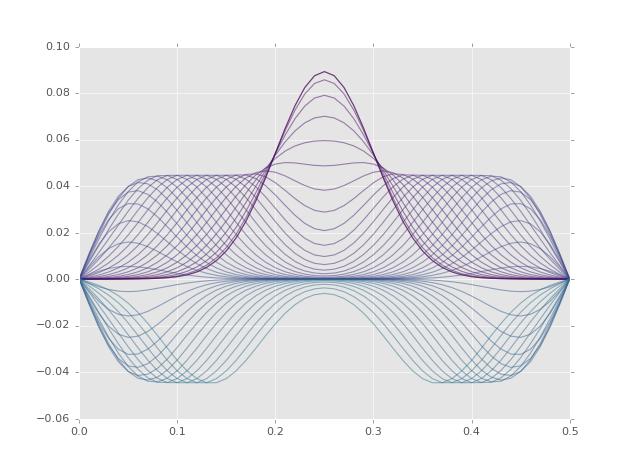

In [4]:
ax = plt.subplot(111)
ax.set_prop_cycle("color", [plt.cm.viridis(i) for i in np.linspace(0, 1, len(y_t))])
ax.plot(X, y_t[:40].T, alpha=0.5);

### 3D plot
(Uses functions from previous lessons.)

In [7]:
def plot_y(y_t, Dx, Dt, step=1):
    X, Y = np.meshgrid(range(y_t.shape[0]), range(y_t.shape[1]))
    Z = y_t.T[Y, X]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_wireframe(Y*Dx, X*Dt*step, Z)
    ax.set_ylabel(r"time $t$ (s)")
    ax.set_xlabel(r"position $x$ (m)")
    ax.set_zlabel(r"displacement $y$ (m)")
    fig.tight_layout()
    return ax

def plot_surf(y_t, Dt, Dx, step=1, filename=None, offset=-1, zlabel=r'displacement',
             elevation=40, azimuth=20, cmap=plt.cm.coolwarm):
    """Plot y_t as a 3D plot with contour plot underneath.
    
    Arguments
    ---------
    y_t : 2D array
          displacement y(t, x)
    filename : string or None, optional (default: None)
          If `None` then show the figure and return the axes object.
          If a string is given (like "contour.png") it will only plot 
          to the filename and close the figure but return the filename.
    offset : float, optional (default: 20)
          position the 2D contour plot by offset along the Z direction
          under the minimum Z value
    zlabel : string, optional
          label for the Z axis and color scale bar
    elevation : float, optional
          choose elevation for initial viewpoint
    azimuth : float, optional
          chooze azimuth angle for initial viewpoint
    """
     
    t = np.arange(y_t.shape[0])
    x = np.arange(y_t.shape[1])
    T, X = np.meshgrid(t, x)
    Y = y_t.T[X, T]
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X*Dx, T*Dt*step, Y, cmap=cmap, rstride=2, cstride=2, alpha=1)
    cset = ax.contourf(X*Dx, T*Dt*step, Y, 20, zdir='z', offset=offset+Y.min(), cmap=cmap)

    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel(zlabel)
    ax.set_zlim(offset + Y.min(), Y.max())
    
    ax.view_init(elev=elevation, azim=azimuth)

    cb = fig.colorbar(surf, shrink=0.5, aspect=5)
    cb.set_label(zlabel)
    
    if filename:
        fig.savefig(filename)
        plt.close(fig)
        return filename
    else:
        return ax

<IPython.core.display.Javascript object>


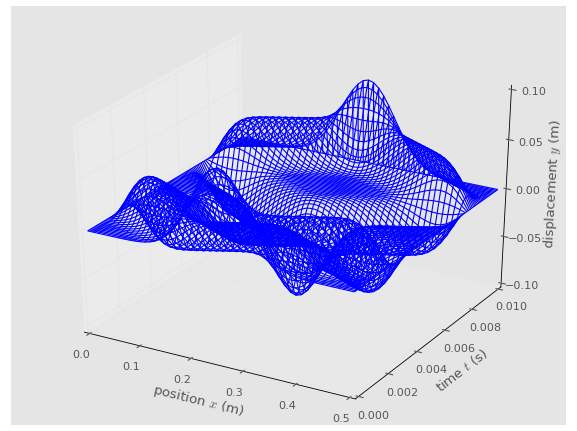

In [8]:
plot_y(y_t, Dx, Dt)

<IPython.core.display.Javascript object>


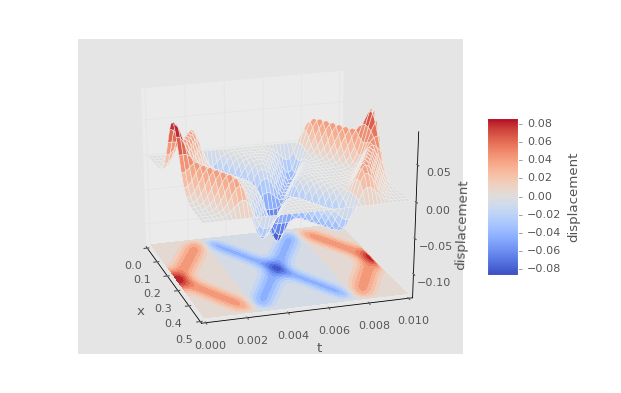

In [11]:
plot_surf(y_t, Dt, Dx, offset=-0.04, cmap=plt.cm.coolwarm)

## von Neumann stability analysis: Courant condition 

Assume that the solutions of the discretized equation can be written as normal modes

$$
y_{m,j} = \xi(k)^j e^{ikm\Delta x}, \quad t=j\Delta t,\ x=m\Delta x 
$$

The time stepping algorith is stable if

$$
|\xi(k)| < 1
$$

Insert normal modes into the discretized equation 


$$
y_{i,j+1} = 2(1 - \beta^2)y_{i,j} - y_{i, j-1} + \beta^2 (y_{i+1,j} + y_{i-1,j}), \quad 
\beta := \frac{c}{\Delta x/\Delta t}
$$

and simplify (use $1-\cos x = 2\sin^2\frac{x}{2}$):

$$
\xi^2 - 2(1-2\beta^2 s^2)\xi + 1 = 0, \quad s=\sin(k\Delta x/2)
$$

The characteristic equation has roots

$$
\xi_{\pm} = 1 - 2\beta^2 s^2 \pm \sqrt{(1-2\beta^2 s^2)^2 - 1}.
$$

It has one root for 

$$
\left|1-2\beta^2 s^2\right| = 1,
$$

i.e., for

$$
\beta s = 1
$$

We have two real roots for 

$$
\left|1-2\beta^2 s^2\right| < 1 \\
\beta s > 1
$$

but one of the roots is always $|\xi| > 1$ and hence these solutions will diverge and not be stable.

For 

$$
\left|1-2\beta^2 s^2\right| ≥ 1 \\
\beta s ≤ 1
$$

the roots will be *complex conjugates of each other*

$$
\xi_\pm = 1 - 2\beta^2s^2 \pm i\sqrt{1-(1-2\beta^2s^2)^2}
$$

and the *magnitude*

$$
|\xi_{\pm}|^2 =  (1 - 2\beta^2s^2)^2 - (1-(1-2\beta^2s^2)^2) = 1
$$

is unity: Thus the solutions will not grow and will be *stable* for

$$
\beta s ≤ 1\\
\frac{c}{\frac{\Delta x}{\Delta t}} \sin\frac{k \Delta x}{2} ≤ 1
$$

Assuming the "worst case" for the $\sin$ factor (namely, 1), the **condition for stability** is

$$
c ≤ \frac{\Delta x}{\Delta t}
$$

or 

$$
\beta ≤ 1.
$$

This is also known as the **Courant condition**. When written as

$$
\Delta t ≤ \frac{\Delta x}{c}
$$

it means that the time step $\Delta t$ (for a given $\Delta x$) must be *smaller than the time that the  wave takes to travel one grid step*.



## Simplified simulation
The above example used real numbers for a cello string. Below is bare-bones where we just set $\beta$.

In [55]:
L = 10.0
Nx = 100
Nt = 100
step = 1

Dx = L/Nx

beta2 = 1.0

X = np.linspace(0, L, Nx+1)  # need N+1!

def gaussian(x):
    return np.exp(-(x-5)**2)

# displacements at j-1, j, j+1
y0 = np.zeros_like(X)
y1 = np.zeros_like(y0)
y2 = np.zeros_like(y0)

# save array
y_t = np.zeros((int(np.ceil(Nt/step)) + 1, Nx+1))

# boundary conditions
y0[0] = y0[-1] = y1[0] = y1[-1] = 0
y2[:] = y0

# initial conditions: velocity 0, i.e. no difference between y0 and y1
y0[:] = y1[:] = gaussian(X)

# save initial
t_index = 0
y_t[t_index, :] = y0
if step == 1:
    t_index += 1
    y_t[t_index, :] = y1

for jt in range(2, Nt):
    y2[1:-1] = 2*(1-beta2)*y1[1:-1] - y0[1:-1] + beta2*(y1[2:] + y1[:-2])
    y0[:], y1[:] = y1, y2
    
    if jt % step == 0 or jt == Nt-1:
        t_index += 1
        y_t[t_index, :] = y2       
        print("Iteration {0:5d}".format(jt), end="\r")
else:
    print("Completed {0:5d} iterations: t={1} s".format(jt, jt*Dt))
        

Completed    99 iterations: t=0.0099 s


In [57]:
%matplotlib inline

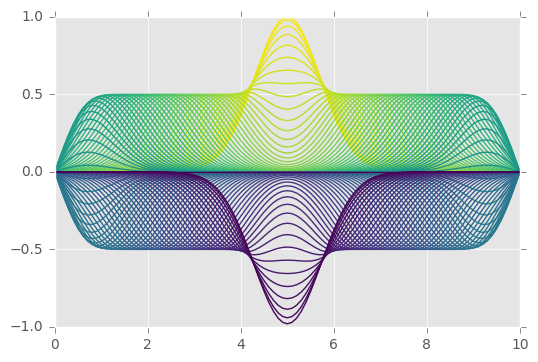

In [58]:
ax = plt.subplot(111)
ax.set_prop_cycle("color", [plt.cm.viridis_r(i) for i in np.linspace(0, 1, len(y_t))])
ax.plot(X, y_t.T);